In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'D:\ANGELO\Documents\dataset_rumah_treated.csv'
raw_data = pd.read_csv(path)

raw_data

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Jatibening,Bekasi,810000000,2.0,1.0,120,90,no,no,no,no,no
1997,Jati Asih,Bekasi,1610000000,2.0,1.0,72,45,yes,no,no,no,no
1998,Jati Asih,Bekasi,1180000000,3.0,2.0,120,90,yes,no,no,no,no
1999,Harapan Indah,Bekasi,910000000,4.0,2.0,105,78,no,no,no,no,no


In [ ]:
raw_data.head()

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no


# Problem
## Bussiness Understanding

Tujuan kita membuat project ini adalah untuk memprediksi harga atau rumah berdasarkan fasilitas yang terdapat pada atau rumah tersebut. serta mengembangkan model prediksi harga rumah di daerah jabodetabek berdasarkan fasilitas yang di miliki oleh rumah.

pembeli atau konsumen biasanya melihat lihat rumah yang memiliki harga yang terjangkau dengan fasilitas yang memadai, karena itu mereka membeli rumah secara objektiv. karena hal itu kami membuat model ini untuk mempermudah proses pencarian dan menghemat waktu para pembeli untuk membeli rumah. harapan kami adalah para pencari rumah bisa menggunakan model ini sebagai panduan mengidentifikasi properti atau rumah berdasarkan fasilitas dan harga yang mereka inginkan.


## Data Understanding

1. **Lokasi** = wilayah tempat properti/rumah berada.disini formatnya kelurahan/kecamatan,kota
2. **Harga** = Harga properti/rumah
3. **Kamar Tidur** = Jumlah Kamar Tidur yang ada pada properti/rumah
4. **Kamar Mandi** = Jumlah Kamar Mandi yang ada pada properti/rumah
5. **Luas Tanah** = Luas tanah pada rumah adalah ukuran tanah yang tertutup oleh bangunan. Luas tanah dapat dihitung dengan mengalikan panjang dan lebar tanah
6. **Luas Bangunan** = Luas bangunan adalah ukuran bangunan yang berdiri di atas tanah.
7. **Fasilitas** = Fasilitas: Keberadaan fasilitas seperti taman, AC, jalur telepon, kolam renang, CCTV, dsb. jika fasilitas tersebut ada akan di tampilkan dengan 'yes' dan jika tidak akan di tampilkan 'no' pada kolom fasilitas masing masing.

12. **Date** = kolom date adalah kolom tanggal. yang berisi tanggal data ini di dapat

## Goal

1. Membuat model prediksi harga rumah di daerah jabodetabek berdasarkan fasilitas yang di miliki oleh rumah
    problem : Estimasi

Algoritma yang di pakai :
    1. Linear Regression
    2. Ridge
    3. Lasso
    4. Random Forest
    5. Ransac


## Data Prep

In [ ]:
# Menampilkan dimensi dataset
raw_data.shape

(2001, 12)

In [ ]:
# Menampilkan informasi detail tentang dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            2001 non-null   object 
 1   kota              2001 non-null   object 
 2   harga             2001 non-null   int64  
 3   K_tidur           2001 non-null   float64
 4   K_mandi           2001 non-null   float64
 5   luas_tanah_m2     2001 non-null   int64  
 6   luas_bangunan_m2  2001 non-null   int64  
 7   taman             2001 non-null   object 
 8   AC                2001 non-null   object 
 9   jalur_telepon     2001 non-null   object 
 10  kolam_renang      2001 non-null   object 
 11  CCTV              2001 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 187.7+ KB


In [ ]:
# Memeriksa jumlah missing value pada dataset
raw_data.isnull().sum()

lokasi              0
kota                0
harga               0
K_tidur             0
K_mandi             0
luas_tanah_m2       0
luas_bangunan_m2    0
taman               0
AC                  0
jalur_telepon       0
kolam_renang        0
CCTV                0
dtype: int64

## Modeling

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew


from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [ ]:
# pisahkan data train dan test
X = raw_data.drop(columns='harga', axis=1)
y = raw_data['harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [ ]:
train.head()

,lokasi,kota,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV,harga
0,Cilodong,Depok,3.0,3.0,160,190,no,no,no,no,no,1400000000
1,Gading Serpong,Tangerang,3.0,3.0,144,140,no,no,no,no,no,3500000000
2,Gunung Sindur,Bogor,3.0,2.0,105,55,no,no,no,no,no,1400000000
3,Cilandak,Jakarta Selatan,4.0,4.0,303,350,no,no,yes,no,no,5100000000
4,Sukaraja,Bogor,3.0,3.0,147,126,yes,no,no,no,no,1350000000


In [ ]:
train.describe()

,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,harga
count,1600.000000,1600.000000,1600.000000,1600.00000,1.600000e+03
mean,3.109375,2.383125,155.904375,152.87875,3.299244e+09
std,1.361459,1.456508,243.168765,185.98074,8.258913e+09
min,1.000000,1.000000,18.000000,21.00000,1.450000e+08
25%,2.000000,1.000000,75.750000,62.00000,8.600000e+08
50%,3.000000,2.000000,104.000000,100.00000,1.400000e+09
75%,4.000000,3.000000,150.000000,160.00000,2.500000e+09
max,20.000000,21.000000,4600.000000,2600.00000,1.490000e+11


In [ ]:
train.shape, test.shape

((1600, 12), (401, 12))

karna pada analisa banyak data yang skew ke kanan maka akan di lakukan transfomrasi

In [ ]:
# skew untuk train

train2 = train[['K_mandi','K_tidur', 'luas_bangunan_m2','luas_tanah_m2','harga']]
skewed_train = train2.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])


In [ ]:
# skew untuk test

test2 = test[['K_mandi','K_tidur', 'luas_bangunan_m2','luas_tanah_m2','harga']]
skewed_test = test2.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > .75]
test[skewed_test.index] = np.log1p(test[skewed_test.index])

In [ ]:
X_train = train.drop(columns='harga', axis=1)
y_train = train['harga']

In [ ]:
# ubah yes/no menjadi 1/0

X_train['CCTV'] = X_train['CCTV'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['taman'] = X_train['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['jalur_telepon'] = X_train['jalur_telepon'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['AC'] = X_train['AC'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['kolam_renang'] = X_train['kolam_renang'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('encode', OneHotEncoder())
])

numeric_features = ['K_tidur','K_mandi','luas_bangunan_m2','luas_tanah_m2','CCTV','taman','jalur_telepon','AC', 'kolam_renang']
categorical_features = ['kota']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)
    ])

In [ ]:
X_test = test.drop(columns='harga', axis=1)
y_test = test['harga']

In [ ]:
# ubah yes/no menjadi 1/0
X_test['CCTV'] = X_test['CCTV'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['taman'] = X_test['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['jalur_telepon'] = X_test['jalur_telepon'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['AC'] = X_test['AC'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['kolam_renang'] = X_test['kolam_renang'].apply(lambda x: 1 if x == 'yes' else 0)

## Model Pipeline

C:\Users\ANGELO\AppData\Local\Temp\ipykernel_12468\281029141.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'RMSE': [rmse], 'MAE': [mae]})], ignore_index=True)


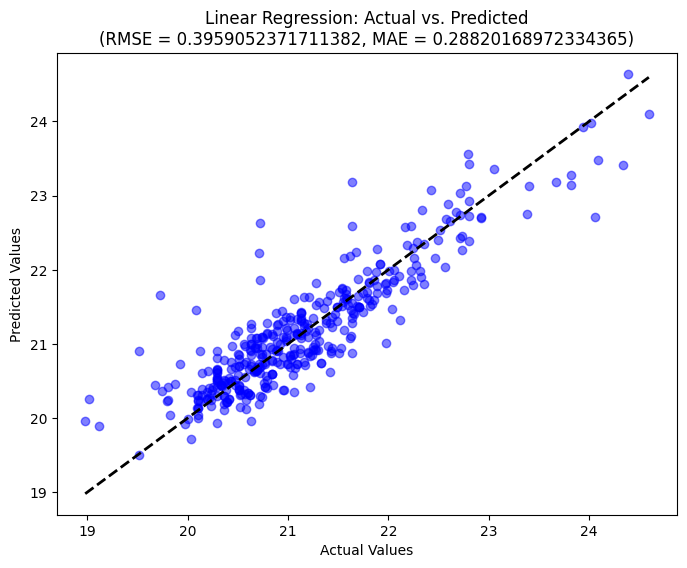

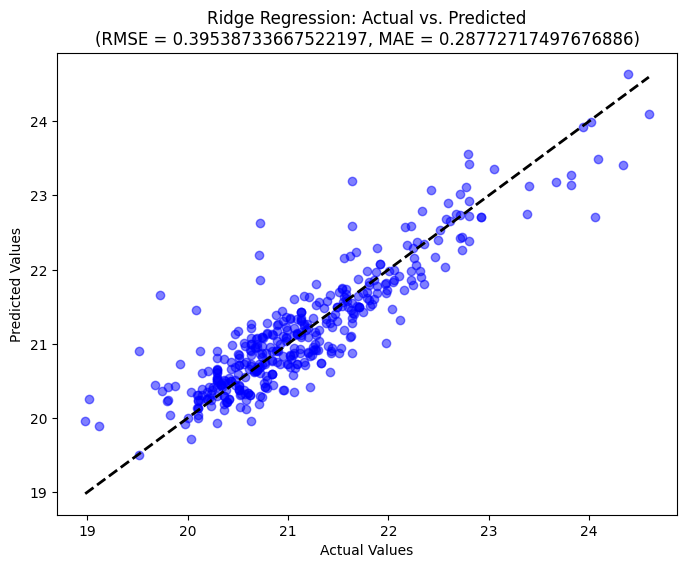

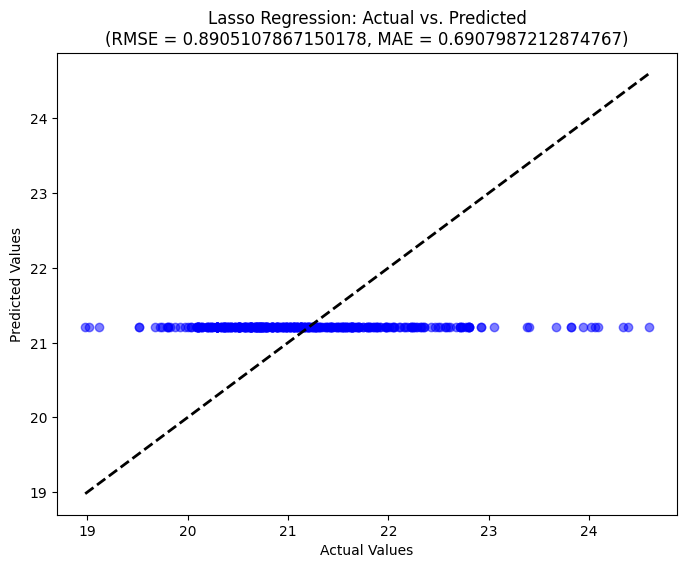

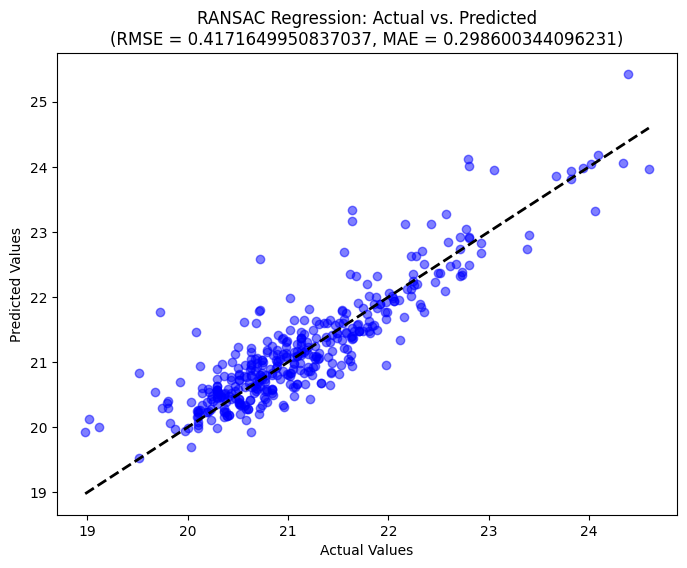

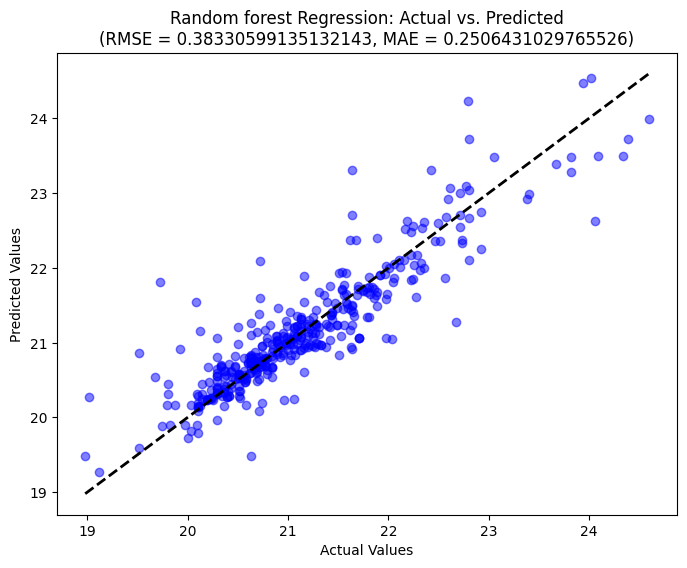

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random forest Regression', RandomForestRegressor())
]

results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

for model_name, model in models:
    pipeline = Pipeline([
        ('Preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Menggunakan pd.concat untuk menggabungkan DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'RMSE': [rmse], 'MAE': [mae]})], ignore_index=True)

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs. Predicted\n(RMSE = {rmse}, MAE = {mae})")
    plt.show()


In [ ]:
results_df

,Model,RMSE,MAE
0,Linear Regression,0.395905,0.288202
1,Ridge Regression,0.395387,0.287727
2,Lasso Regression,0.890511,0.690799
3,RANSAC Regression,0.417165,0.298600
4,Random forest Regression,0.383306,0.250643


Dilihat dari hasil RMSE dan MAE dari setiap model, model Random Forest Regression adalah model yang terbaik untuk memprediksi harga rumah di daerah Jabodetabek berdasarkan fasilitas yang di miliki. tapi masih bisa di tuning lagi.

## Parameter Tuning

In [ ]:
# Definisi parameter yang akan di-tune
param = {
    'model__n_estimators': [25, 50, 100, 200],
    'model__max_depth': [None, 3, 6, 9],
    'model__min_samples_split': [1, 2, 4, 8],
    'model__min_samples_leaf':[None, 3, 6, 9]
}


model = GridSearchCV(pipeline,
                     param_grid=param,
                     cv=3,
                     n_jobs=-1,
                     verbose=1
                    )

model.fit(X_train, y_train)


Fitting 3 folds for each of 256 candidates, totalling 768 fits


c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
336 fits failed out of a total of 768.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-pack

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['K_tidur',
                                                                          'K_mandi',
                                                                          'luas_bangunan_m2',
                                                                          'luas_tanah_m2',
                                                                          'CCTV',
                                                                          'taman',
                                                                          'jalur_telepon',
                                                                          'AC',
                                                                          'kolam_renang']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder())]),
                                                                         ['kota'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 3, 6, 9],
                         'model__min_samples_leaf': [None, 3, 6, 9],
                         'model__min_samples_split': [1, 2, 4, 8],
                         'model__n_estimators': [25, 50, 100, 200]},
             verbose=1)

In [ ]:
pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
26,0.745376,0.011970,0.025249,0.002352,None,3,4,100,"{'model__max_depth': None, 'model__min_samples...",0.816013,0.860974,0.815829,0.830939,0.021238,1
23,1.369337,0.073268,0.042754,0.010359,None,3,2,200,"{'model__max_depth': None, 'model__min_samples...",0.817549,0.858199,0.813702,0.829817,0.020131,2
31,1.101657,0.014825,0.032118,0.004139,None,3,8,200,"{'model__max_depth': None, 'model__min_samples...",0.815170,0.861153,0.812626,0.829650,0.022301,3
25,0.338850,0.049062,0.023777,0.014867,None,3,4,50,"{'model__max_depth': None, 'model__min_samples...",0.815295,0.861088,0.812087,0.829490,0.022382,4
30,0.620788,0.010938,0.021687,0.002475,None,3,8,100,"{'model__max_depth': None, 'model__min_samples...",0.817041,0.858564,0.811145,0.828917,0.021102,5


In [ ]:
model.best_params_

{'model__max_depth': None,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 4,
 'model__n_estimators': 100}

In [ ]:
pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth=None,
                                    max_leaf_nodes=None,
                                    min_samples_split=4,
                                    n_estimators=100))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

rmse, mae

(0.38821150113558095, 0.2575589636545689)

In [ ]:
import joblib

encoder = pipeline.named_steps['Preprocessor'].named_transformers_['cat'].named_steps['encode']
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

In [ ]:
model_filename = 'D:\.vscode\kodingan\model_finalProject\\final_project_model.joblib'
joblib.dump(pipeline, model_filename)

['D:\\.vscode\\kodingan\\model_finalProject\\final_project_model.joblib']